In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RTA Dataset.csv')
print('Records:', df.shape[0], '\nColumns:', df.shape[1])
df.head()

Records: 12316 
Columns: 32


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


In [ ]:
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']
len(features)

17

In [ ]:
featureset_df = n_df[features]
target = n_df['Accident_severity']

In [ ]:
feature_df = featureset_df.copy()

In [ ]:
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

In [ ]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

In [ ]:
feature_df.isnull().sum()

Day_of_week                    0
Number_of_vehicles_involved    0
Number_of_casualties           0
Area_accident_occured          0
Types_of_Junction              0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Type_of_vehicle                0
Driving_experience             0
Service_year_of_vehicle        0
Type_of_collision              0
Sex_of_casualty                0
Age_band_of_casualty           0
Cause_of_accident              0
Hour_of_Day                    0
dtype: int64

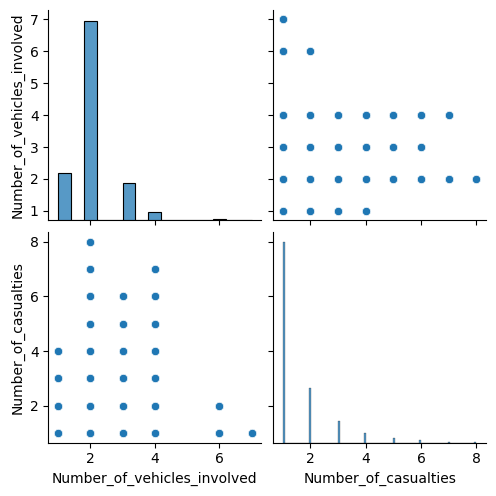

In [ ]:
sns.pairplot(df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

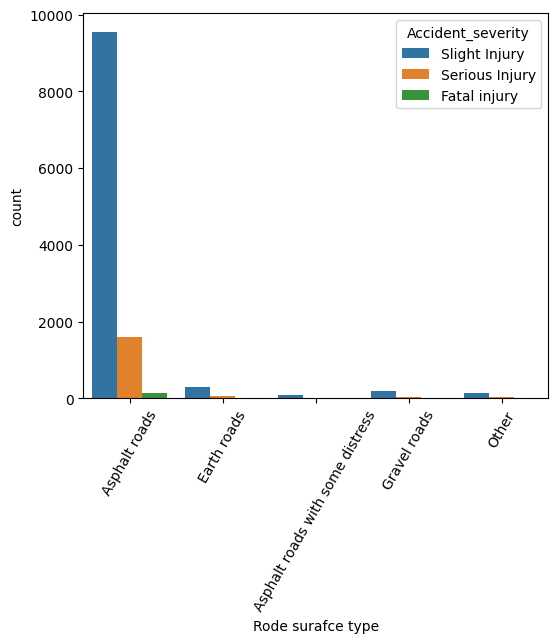

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

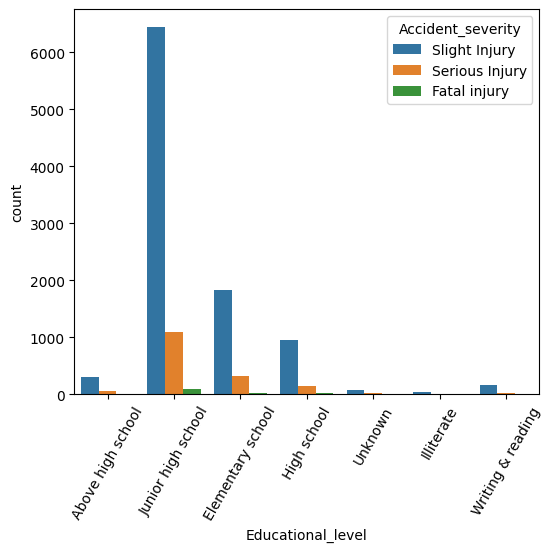

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Educational_level', hue='Accident_severity', data=df)
plt.xlabel('Educational_level')
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

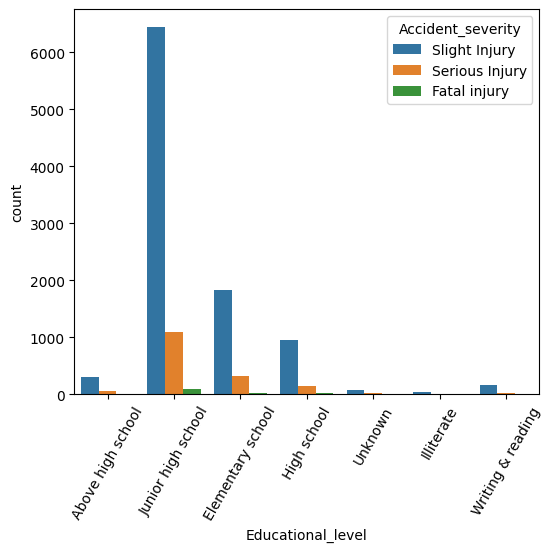

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Educational_level', hue='Accident_severity', data=df)
plt.xlabel('Educational_level')
plt.xticks(rotation=60)
plt.show

<Figure size 500x500 with 0 Axes>

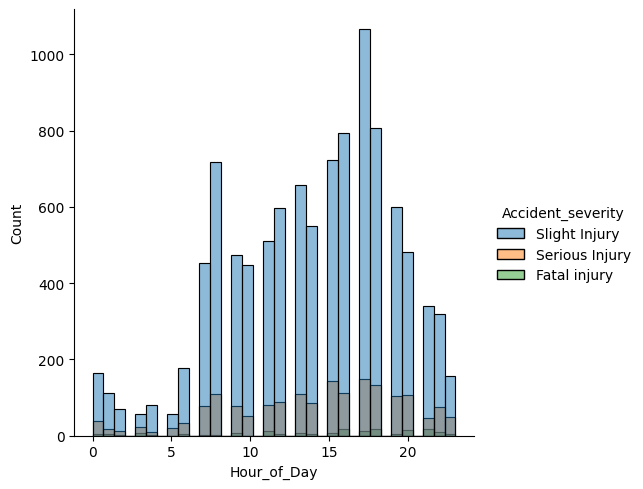

In [ ]:
plt.figure(figsize=(5,5))
sns.displot(x='Hour_of_Day', hue='Accident_severity', data=n_df)
plt.show()

<Figure size 600x500 with 0 Axes>

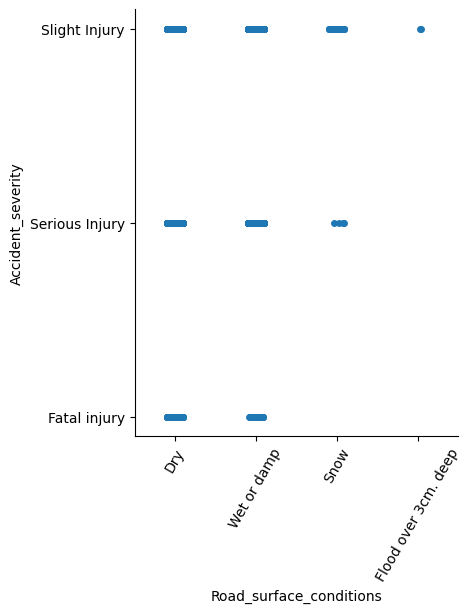

In [ ]:
plt.figure(figsize=(6,5))
sns.catplot(x='Road_surface_conditions', y='Accident_severity', data=df)
plt.xlabel("Road_surface_conditions")
plt.xticks(rotation=60)
plt.show()

<Axes: >

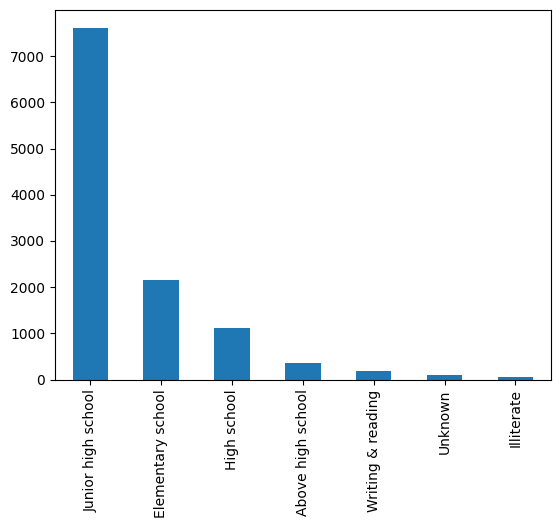

In [ ]:
df['Educational_level'].value_counts().plot(kind='bar')

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


<Axes: >

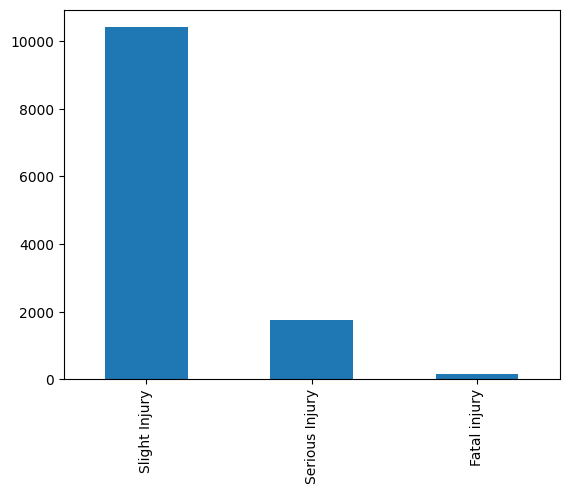

In [ ]:
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

<Axes: >

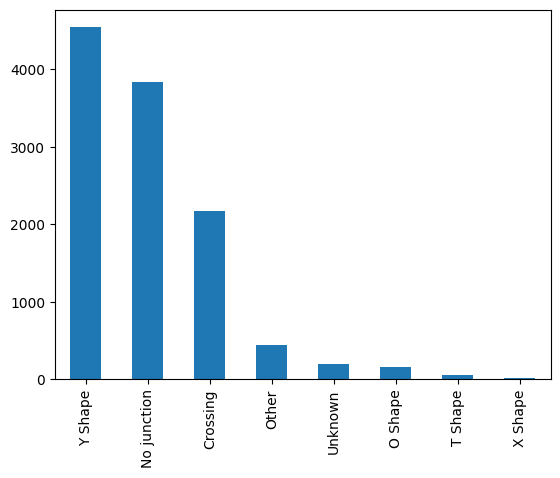

In [ ]:
df['Types_of_Junction'].value_counts().plot(kind='bar')

<Axes: >

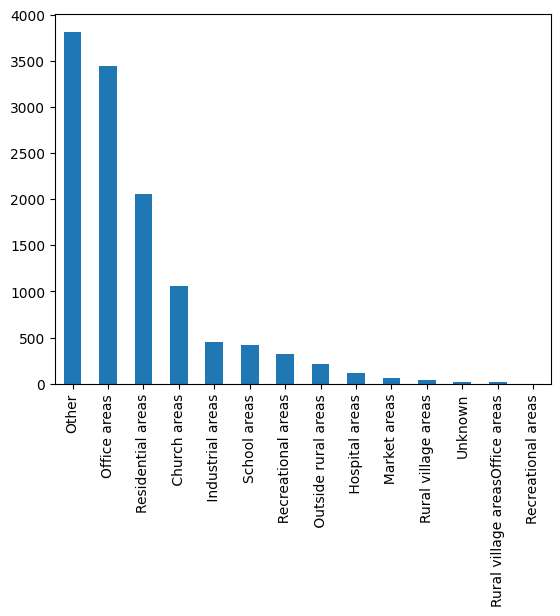

In [ ]:
df['Area_accident_occured'].value_counts().plot(kind='bar')

<Axes: >

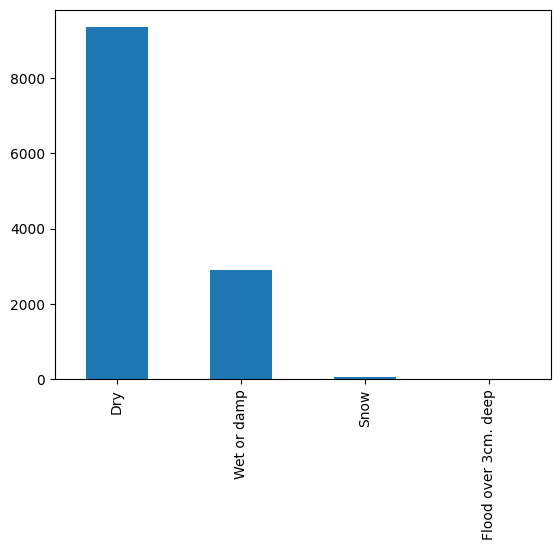

In [ ]:
df['Road_surface_conditions'].value_counts().plot(kind='bar')

<Axes: >

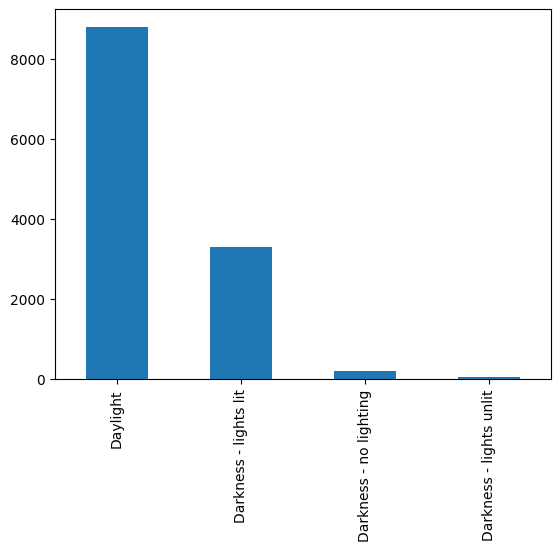

In [ ]:
df['Light_conditions'].value_counts().plot(kind='bar')

<Axes: >

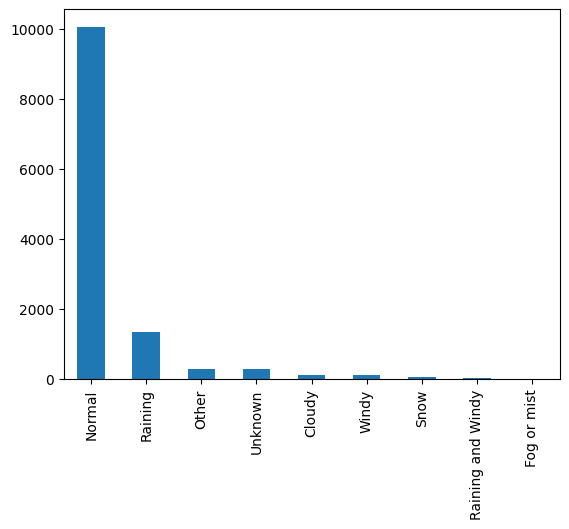

In [ ]:
df['Weather_conditions'].value_counts().plot(kind='bar')

<Axes: >

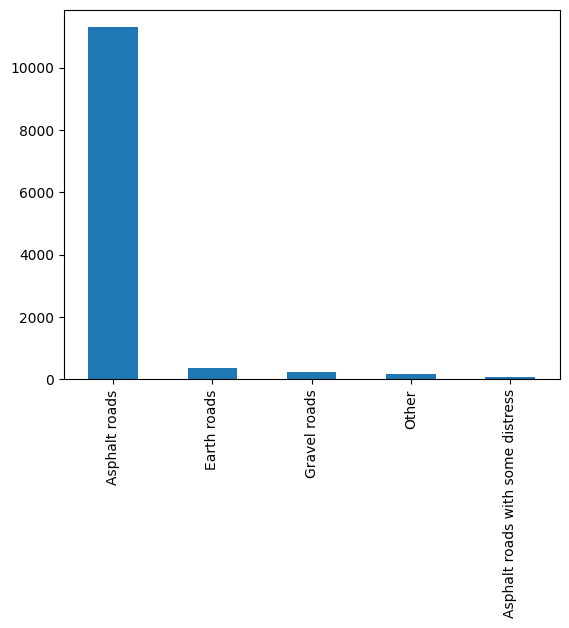

In [ ]:
df['Road_surface_type'].value_counts().plot(kind='bar')

In [ ]:
X = feature_df[features]
y = target

In [ ]:
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [ ]:
from imblearn.over_sampling import SMOTENC
n_cat_index = np.array(range(3,50))

smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)
X_n.shape, y_n.shape

NameError: ignored

In [ ]:
y_n.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_n, y_n, test_size=0.3, random_state=3,stratify=y_n)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=3)
rf.fit(x_train, y_train)
rf.score(x_train,y_train)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
rf.score(x_test,y_test)

In [ ]:
print(len(x_train),len(y_train))

In [ ]:
print(len(x_test),len(y_test))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
predics = rf.predict(X_test)

# train score
rf.score(X_train, y_train)

In [ ]:
classif_re = classification_report(y_test,predics)
print(classif_re)

In [ ]:
f1score = f1_score(y_test,predics, average='weighted')
print(f1score)